In [176]:
from graphviz import Digraph

In [177]:
class ArbreBinaire:
    def __init__(self,cle =None , gauche = None, droite = None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite

In [178]:
class TrieBin :
    def __init__(self, tab , c = None):
        self.tab = tab  # Exemple : tab = [('a','01'),('b','11'),('c','00'),('d','10')]
        if c is None :
            self.racine = None
        else :  #On suppose que c est un caractère et que tab est un tableau de couples (caractère, caractère binaire)
            self.racine = ArbreBinaire(c)
            
    def ArbreVide(self):
        return ArbreBinaire()

    def car(self, c , i):
        for k , v in self.tab.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        return None

    def TrieBin_Ajout(self, c):
        self.racine = self.TrieBin_Ajout_rang(self.racine, c, 0)
        return self
    

    def TrieBin_Ajout_rang(self,arbre, c, i):
        if arbre is None:
            return ArbreBinaire(c)
        new_node = ArbreBinaire(c)
        if arbre.gauche is None and arbre.droite is None:
            if arbre.cle == c:
                return arbre
            else:
                arbre = self.split(arbre.cle, c, i)
                return arbre
        if self.car(c, i) == 0:
            if arbre.gauche is None:
                arbre.gauche = new_node
            else:
                arbre.gauche = self.TrieBin_Ajout_rang(arbre.gauche , c, i + 1 )
        else:
            if arbre.droite is None:
                arbre.droite = new_node
            else:
                arbre.droite = self.TrieBin_Ajout_rang(arbre.droite, c, i + 1 )
        return arbre


    def split(self, c1 , c2, i): # c1 est un caractère deja dans l'arbre, c2 est un caractère à ajouter
        if self.car(c1,i) == self.car(c2,i) == 0:
            return ArbreBinaire( '*' , self.split(c1, c2, i+1), None)
        if self.car(c1,i) == self.car(c2,i) == 1:
            return ArbreBinaire( '*' , None, self.split(c1, c2, i+1))
        if self.car(c1,i) == 0 and self.car(c2,i) == 1:
            return ArbreBinaire( '*' , ArbreBinaire(c1), ArbreBinaire(c2))
        if self.car(c1,i) == 1 and self.car(c2,i) == 0:
            return ArbreBinaire( '*' , ArbreBinaire(c2), ArbreBinaire(c1))
                

    def TrieBin_Recherche(self, c):
        return self.TrieBin_Recherche_rang(self.racine, c, 0)
    

    def TrieBin_Recherche_rang(self, arbre, c, i):
        if arbre is None:
            return False
        if arbre.cle == c:
            return True
        if self.car(c, i) == 0:
            return self.TrieBin_Recherche_rang(arbre.gauche, c, i + 1)
        else:
            return self.TrieBin_Recherche_rang(arbre.droite, c, i + 1)


    def TrieBin_Suppression(self, c):
        return self.TrieBin_Suppression_rang(self.racine, c, 0)
    
    def TrieBin_Suppression_rang(self, arbre, c, i):
        if arbre is None:
            return None
        if arbre.cle == c:
            if arbre.gauche is None and arbre.droite is None:
                arbre = None
                return None
            if arbre.gauche is None:
                arbre = arbre.droite
                return arbre.droite
            if arbre.droite is None:
                arbre = arbre.gauche
                return arbre.gauche
            # else:
            #     tmp = self.TrieBin_min(arbre.droite)
            #     arbre.cle = tmp.cle
            #     arbre.droite = self.TrieBin_Suppression_rang(arbre.droite, tmp.cle, i + 1)
            #     return arbre
        if self.car(c, i) == 0:
            arbre.gauche = self.TrieBin_Suppression_rang(arbre.gauche, c, i + 1)
        else:
            arbre.droite = self.TrieBin_Suppression_rang(arbre.droite, c, i + 1)
        return arbre
    
    # def TrieBin_min(self, arbre):
    #     cur = arbre
    #     while cur.gauche is not None:
    #         cur = cur.gauche
    #     return cur



    def TrieBin_update(self, arbre):    
        if arbre is None:
            return None

        arbre.gauche = self.TrieBin_update(arbre.gauche)
        arbre.droite = self.TrieBin_update(arbre.droite)
        if arbre.cle == '*' and arbre.gauche is None and arbre.droite is None:
            arbre = None

        return arbre
            

    def TrieBin_updateFill(self, arbre): # Remplir les noeuds ayant un seul fils, pour qu'ils aient deux fils
        if arbre is None:
            return None
        arbre.gauche = self.TrieBin_updateFill(arbre.gauche)
        arbre.droite = self.TrieBin_updateFill(arbre.droite)
        if arbre.cle == '*' and arbre.gauche is not None and arbre.droite is None:
            arbre.droite = ArbreBinaire('*')
        if arbre.cle == '*' and arbre.gauche is None and arbre.droite is not None:
            arbre.gauche = ArbreBinaire('*')
        return arbre
    


    def TrieBin_Construction(self):
        for i in self.tab.keys():
            self.TrieBin_Ajout(i)
        return self


    def visualiser_arbre(self):
        dot = Digraph()
        compteur = 1

        def ajouter_noeuds_et_arcs(noeud):
            nonlocal dot, compteur
            if noeud is not None:
                tmp = noeud.cle
                cle = str(noeud.cle)
                if '*' in cle:
                    cle = '*'+str(compteur)
                    compteur += 1
                dot.node(cle , label= cle if tmp != '*' else ' ' , width="0.5" if tmp == '*' else '')
                if noeud.gauche is not None:
                    if '*' in noeud.gauche.cle:
                        compteur += 1
                        node_g = '*'+str(compteur)
                        dot.edge(cle , node_g , label = "0" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.gauche.cle) , label = "0" , fontsize="10")
                    ajouter_noeuds_et_arcs(noeud.gauche)

                if noeud.droite is not None:
                    if '*' in noeud.droite.cle:
                        compteur += 1
                        node_d = '*'+str(compteur)
                        dot.edge(cle , node_d , label = "1" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.droite.cle) , label = "1" , fontsize="10")
                    ajouter_noeuds_et_arcs(noeud.droite)

        ajouter_noeuds_et_arcs(self.racine)
        return dot



    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

In [179]:
def test_TrieBin():
    tab = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}
    triebin = TrieBin(tab)
    triebin = triebin.TrieBin_Construction()
    triebin.afficher_arbre(triebin.racine)

    # print("-----------test avoir 'A'-----------")
    # print("trouver A ?",triebin.racine.gauche.gauche.gauche.gauche.cle)

    # triebin.TrieBin_Ajout('A')
    # triebin.afficher_arbre(triebin.racine)
    # print("----------------------")
    # triebin.TrieBin_Suppression('A')
    # triebin.afficher_arbre(triebin.racine)



    # print("----------------------")
    # for k in tab.keys():
    #     trouver = triebin.TrieBin_Recherche(k)
    #     print("trouver",k,"?",trouver)

    # trouver = triebin.TrieBin_Recherche('89')
    # print("trouver 89 ?",trouver)

    print("------------Suppriner 'E'-----------")
    suppr = triebin.TrieBin_Suppression('E')
    trouver = triebin.TrieBin_Recherche('E')
    print("trouver E ?",not(trouver))
    triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------Supprimer 'A'-----------")
    suppr = triebin.TrieBin_Suppression('A')
    trouver = triebin.TrieBin_Recherche('A')
    print("trouver A ?",not(trouver))
    triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------Supprimer 'C'-----------")
    suppr = triebin.TrieBin_Suppression('C')
    trouver = triebin.TrieBin_Recherche('C')
    print("trouver C ?",(trouver))
    triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------Supprimer 'G'-----------")
    suppr = triebin.TrieBin_Suppression('G')
    trouver = triebin.TrieBin_Recherche('G')
    print("trouver G ?",(trouver))
    triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)




test_TrieBin()

   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|--*
         |--G
      |--*
         |--E
   |--*
         |--C
      |--*
         |--A
------------Suppriner 'E'-----------
trouver E ? True
   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|--*
         |--G
      |--*
   |--*
         |--C
      |--*
         |--A
------------Supprimer 'A'-----------
trouver A ? True
   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|--*
         |-

<h1>TEST</h1>

<h2>Test Ajout</h2>

In [180]:
tab = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}

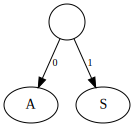

In [181]:
test_TrieBin = TrieBin(tab)
test_TrieBin.TrieBin_Ajout('A')
test_TrieBin.TrieBin_Ajout('S')
test_TrieBin.visualiser_arbre()

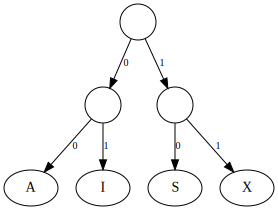

In [182]:
test_TrieBin.TrieBin_Ajout('I')
test_TrieBin.TrieBin_Ajout('X')
test_TrieBin.visualiser_arbre()

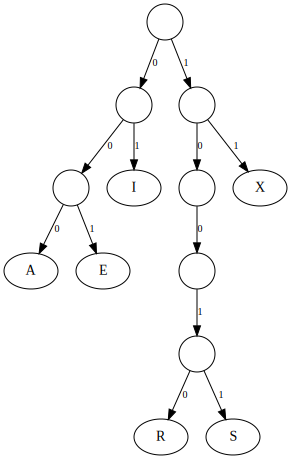

In [183]:
test_TrieBin.TrieBin_Ajout('E')
test_TrieBin.TrieBin_Ajout('R')
test_TrieBin.visualiser_arbre()

<h2>Tester Construction</h2>

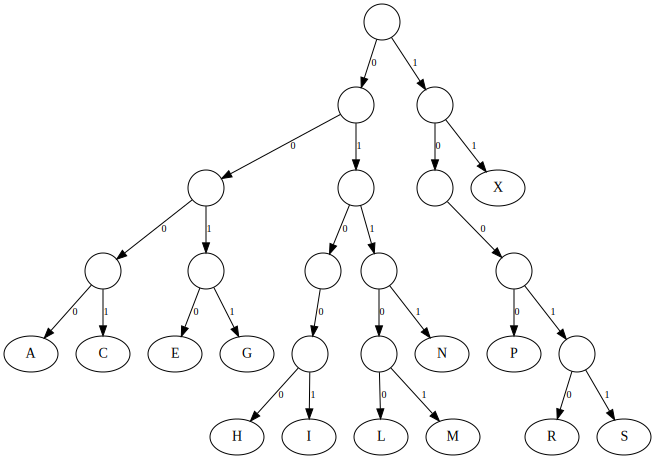

In [184]:
test_TrieBin2 = TrieBin(tab)
test_TrieBin2 = test_TrieBin2.TrieBin_Construction()
test_TrieBin2.visualiser_arbre()

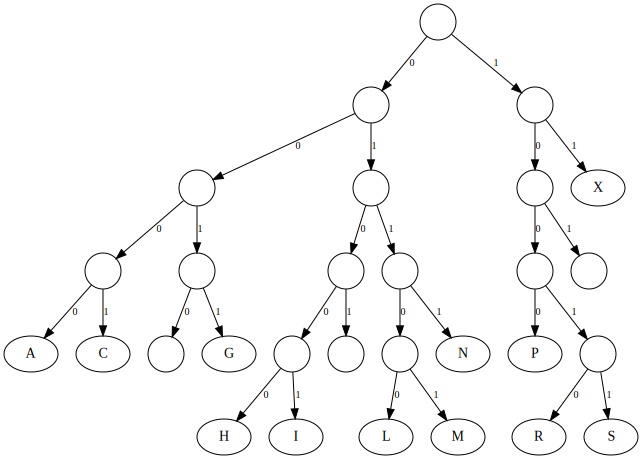

In [185]:

test_TrieBin2.TrieBin_Suppression('E')
test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.TrieBin_updateFill(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

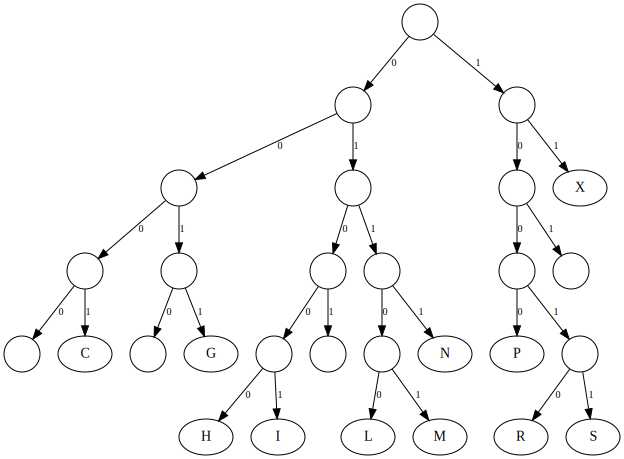

In [186]:
test_TrieBin2.TrieBin_Suppression('A')
test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.TrieBin_updateFill(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

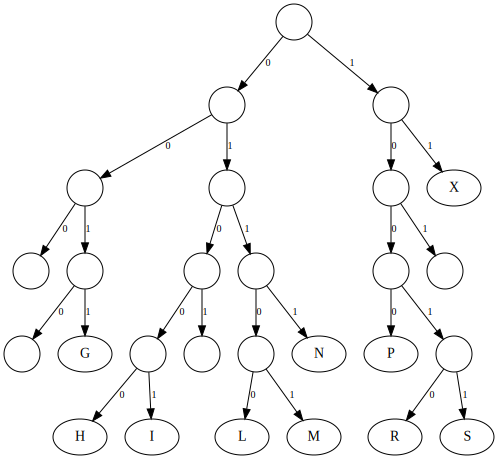

In [187]:
test_TrieBin2.TrieBin_Suppression('C')
test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.TrieBin_updateFill(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

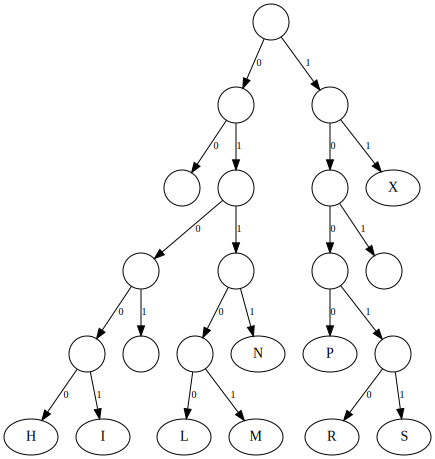

In [188]:
test_TrieBin2.TrieBin_Suppression('G')
test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.TrieBin_updateFill(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

<h2>TEST 2</h2> 

In [189]:
tab2 = {'A': '10001', 'S': '10010', 'R': '10100',  'H': '10101', 'G': '11000', 'M': '11010', 'L': '11111'}

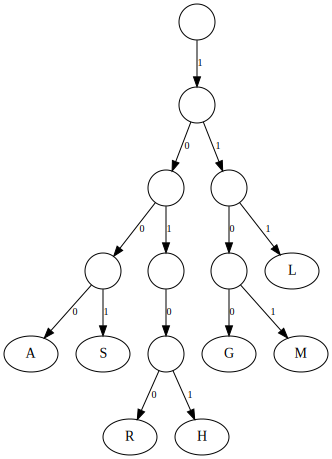

In [190]:
test_TrieBin3 = TrieBin(tab2)
test_TrieBin3 = test_TrieBin3.TrieBin_Construction()
test_TrieBin3.visualiser_arbre()